In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import scipy.stats
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score

In [2]:
hr=pd.read_csv('DS2_C5_S3_HR_Data_Practice.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Task 1

<AxesSubplot:xlabel='salary'>

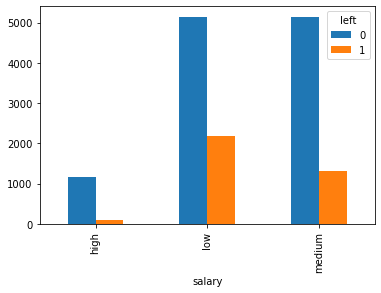

In [3]:
pd.crosstab(hr['salary'],hr['left']).plot(kind='bar')

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


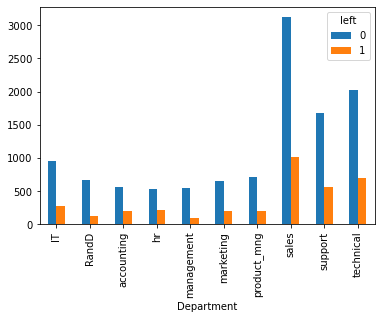

In [11]:
salarycross=pd.crosstab(hr['Department'],hr['left'])
salarycross.plot(kind='bar')
salarycross

### Task 2

In [5]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot:>

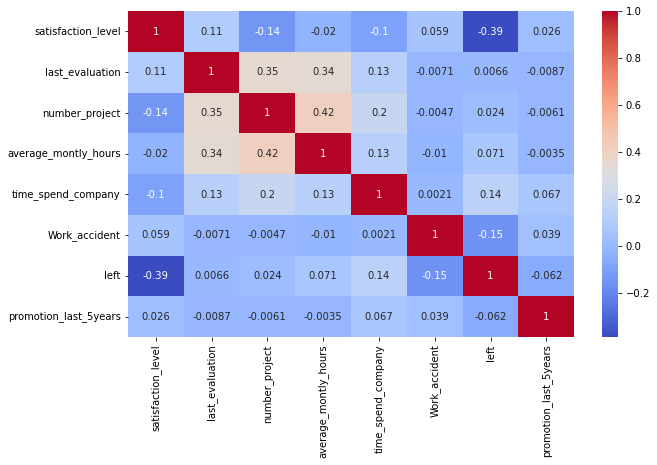

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [12]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['Department'])
hr['Department']=label_encoder.transform(hr['Department'])

In [13]:
label_encoder=preprocessing.LabelEncoder()
label_encoder.fit(hr['salary'])
hr['salary']=label_encoder.transform(hr['salary'])

<AxesSubplot:>

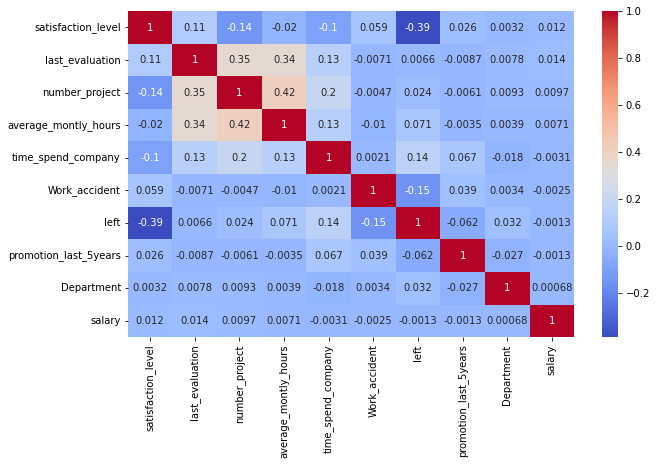

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(hr.corr(),annot=True,cmap='coolwarm')

In [24]:
x=hr.drop('left',axis=1)
y=hr['left']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 88)

In [26]:
log_model=LogisticRegression()

In [27]:
log_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
test_prediction=log_model.predict(x_test)

In [29]:
np.unique(test_prediction,return_counts=True)

(array([0, 1], dtype=int64), array([3999,  501], dtype=int64))

In [32]:
print('accuracy:', accuracy_score(y_test, test_prediction))
print('recall:', recall_score(y_test, test_prediction))
print('f1-score:', f1_score(y_test, test_prediction))
print('precision:', precision_score(y_test, test_prediction))

accuracy: 0.7706666666666667
recall: 0.25393883225208524
f1-score: 0.3468354430379747
precision: 0.5469061876247505


In [39]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_test, log_model.predict_proba(x_test)[:,1])
roc

0.8084117099341986

In [41]:
y_hat=log_model.predict_proba(x_test)
pos_prob=y_hat[:,1]

In [55]:
roc=roc_auc_score(y_test,pos_prob)
print('ROC: %.3f' % roc)

ROC: 0.808


In [54]:
auc = roc_auc_score(y_test, y_hat[:,1])
print('AUC: %.3f' % auc)

AUC: 0.808


In [48]:
confusion_matrix(y_test,test_prediction,labels=[1,0])

array([[ 274,  805],
       [ 227, 3194]], dtype=int64)

In [49]:
print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3421
           1       0.55      0.25      0.35      1079

    accuracy                           0.77      4500
   macro avg       0.67      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



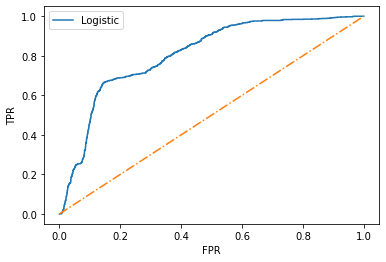

In [50]:
fpr,tpr,threshholds=roc_curve(y_test,pos_prob)
plt.plot(fpr,tpr,label='Logistic')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.plot([0,1],[0,1],linestyle='dashdot',label='No skill')
plt.show()

In [58]:
hrcoef=log_model.coef_
hrcoef

array([[-4.03434786,  0.7352852 , -0.29872322,  0.00431281,  0.23143026,
        -1.5643233 , -1.46748054,  0.04366115,  0.02583539]])

In [70]:
hrcoefse=pd.Series(hrcoef[0],index=x.columns).sort_values()
hrcoefdf=pd.DataFrame(hrcoefse,columns=['coef'])
hrcoefdf

,coef
satisfaction_level,-4.034348
Work_accident,-1.564323
promotion_last_5years,-1.467481
number_project,-0.298723
average_montly_hours,0.004313
salary,0.025835
Department,0.043661
time_spend_company,0.231430
last_evaluation,0.735285


In [94]:
# satisfaction_level,Work_accident,promotion_last_5years,number_project seem to impact attrition ngatively,
# whereas time_spend_company and last_evaluation seem to have a direct effect.